In [ ]:
%%capture
!pip install openmined_psi

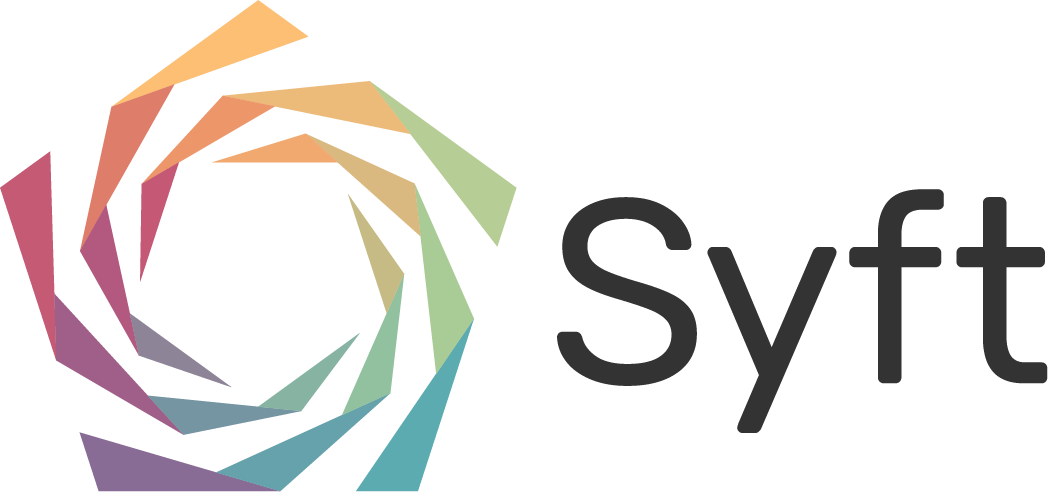

🎤  🎸  ♪♪♪ Starting Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ >             Use at your own risk.
♫♫♫ >
♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://localhost:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... DONE!

♫♫♫ > STEP 1: Send the following code to your Duet Partner!

import syft as sy
duet = sy.join_duet(loopback=True)

♫♫♫ > Connecting...
♫♫♫ > ...using a running event loop...

♫♫♫ > CONNECTED!

♫♫♫ > DUET LIVE STATUS  *  Objects: 5  Requests: 0   Messages: 36                                

In [1]:
import syft as sy
duet = sy.launch_duet(loopback=True)
sy.logger.add(sink="./syft_do.log")

In [2]:
import openmined_psi as psi

In [3]:
sy.load("openmined_psi")

# [Server-Step-1]

## send reveal_intersection

In [4]:
reveal_intersection = False

In [5]:
duet.requests.add_handler(
    name="reveal_intersection",
    action="accept"
)

sy_reveal_intersection = sy.lib.python.Bool(reveal_intersection)
sy_reveal_intersection_ptr = sy_reveal_intersection.send(duet, pointable=True, tags=["reveal_intersection"], description="reveal intersection value")

In [6]:
duet.store.pandas

ID                   Tags  \
0  <UID: 6e4834534111430a927f3d5859fec6db>  [reveal_intersection]   

                 Description  
0  reveal intersection value

## send fpr

In [7]:
# allow the client to access the false positive rate
fpr=1e-6

duet.requests.add_handler(
    name="fpr",
    action="accept"
)
sy_fpr = sy.lib.python.Float(fpr)
sy_fpr_ptr = sy_fpr.send(duet, pointable=True, tags=["fpr"], description="false positive rate")

In [8]:
duet.store.pandas

ID                   Tags  \
0  <UID: 6e4834534111430a927f3d5859fec6db>  [reveal_intersection]   
1  <UID: d007553a37ee4ff190c455d9a0ed1474>                  [fpr]   

                 Description  
0  reveal intersection value  
1        false positive rate

# Goto --------> [Client-Step-1]

# [Server-Step-2]

## get client_items_len

In [9]:
client_items_len = duet.store["client_items_len"].get(delete_obj=False)

## send setup message

In [10]:
server_items = ["Element " + str(2 * i) for i in range(1000)]

In [11]:
server = psi.server.CreateWithNewKey(reveal_intersection)

In [12]:
setup = server.CreateSetupMessage(fpr, client_items_len, server_items)
type(setup)

private_set_intersection.proto.psi_pb2.ServerSetup

In [13]:
duet.requests.add_handler(
    name="setup",
    action="accept"
)

In [14]:
setup_ptr = setup.send(duet, pointable=True, tags=["setup"], description="psi.server Setup Message")

In [15]:
duet.store.pandas

ID                   Tags  \
0  <UID: 6e4834534111430a927f3d5859fec6db>  [reveal_intersection]   
1  <UID: d007553a37ee4ff190c455d9a0ed1474>                  [fpr]   
2  <UID: 2111b6d7a68b4bd48bdb81c7cfb21b5b>     [client_items_len]   
3  <UID: fd5746a341e848259f14a09d94e23bb3>                [setup]   

                 Description  
0  reveal intersection value  
1        false positive rate  
2        client items length  
3   psi.server Setup Message

# Goto --------> [Client-Step-2]

# [Server-Step-3]

## get request

In [16]:
duet.store.pandas

ID                   Tags  \
0  <UID: 6e4834534111430a927f3d5859fec6db>  [reveal_intersection]   
1  <UID: d007553a37ee4ff190c455d9a0ed1474>                  [fpr]   
2  <UID: 2111b6d7a68b4bd48bdb81c7cfb21b5b>     [client_items_len]   
3  <UID: fd5746a341e848259f14a09d94e23bb3>                [setup]   
4  <UID: 43341c19a2c4492d93c866eb50068274>              [request]   

                 Description  
0  reveal intersection value  
1        false positive rate  
2        client items length  
3   psi.server Setup Message  
4             client request

In [17]:
request_ptr = duet.store["request"]

In [18]:
request = request_ptr.get(delete_obj=False)
type(request)

private_set_intersection.proto.psi_pb2.Request

## send response

In [19]:
response = server.ProcessRequest(request)
type(response)

private_set_intersection.proto.psi_pb2.Response

In [20]:
duet.requests.add_handler(
    name="response",
    action="accept"
)

In [21]:
response_ptr = response.send(duet, pointable=True, tags=["response"], description="psi.server response")

In [22]:
duet.store.pandas

ID                   Tags  \
0  <UID: 6e4834534111430a927f3d5859fec6db>  [reveal_intersection]   
1  <UID: d007553a37ee4ff190c455d9a0ed1474>                  [fpr]   
2  <UID: 2111b6d7a68b4bd48bdb81c7cfb21b5b>     [client_items_len]   
3  <UID: fd5746a341e848259f14a09d94e23bb3>                [setup]   
4  <UID: 43341c19a2c4492d93c866eb50068274>              [request]   
5  <UID: d9c6b65240d74ec6ad3a2a55f41c70f8>             [response]   

                 Description  
0  reveal intersection value  
1        false positive rate  
2        client items length  
3   psi.server Setup Message  
4             client request  
5        psi.server response

# Goto --------> [Client-Step-3]